# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations
1) Temperature is highest at the equator and decreases symmetrically along the latitudes while going further away from the equator. 
2) Humidity across latitude is generally uniform with little correlation in both hemispheres. 
3) Cloudiness is uniformly spread across all latitudes, but can range from 0% cloudiness to close to 100% cloudiness in the same latitude. 
4) Wind speed tends to stay between 0-15 mph across all latitudes. There is not much correlation between wind speed and latitude in either hemisphere. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Make empty lists for weather features
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
lat = []
long = []
cities_present = []

# Set counters for records and sets
count_record = 0
count_set = 1

# Loop through cities 
for city in cities:
    # Construct query_url
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Traverse through the json, find relevant data, and append to respective lists
    try:
        temperature.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        countries.append(weather_json["sys"]["country"])
        dates.append(weather_json["dt"])
        lat.append(weather_json["coord"]["lat"])
        long.append(weather_json["coord"]["lon"])
        
        # Organize the city count records into 12 sets of 50 each 
        if count_record > 49:
            count_record = 0
            count_set += 1
            # Append the cities found into a list called cities_present
            cities_present.append(city)
        else:
            count_record += 1
            # Append the cities found into a list called cities_present
            cities_present.append(city)
        print(f"Processing Record {count_record} of Set {count_set} | {city}")
        
    # Handle exceptions by KeyError
    except KeyError:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | hervey bay
Processing Record 2 of Set 1 | faya
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | nizhniy odes
Processing Record 5 of Set 1 | dibulla
Processing Record 6 of Set 1 | west bay
Processing Record 7 of Set 1 | baruun-urt
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tawang
Processing Record 10 of Set 1 | faanui
City not found. Skipping...
Processing Record 11 of Set 1 | honningsvag
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | aklavik
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | linhares
Processing Record 18 of Set 1 | kushiro
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | leningradskiy
Processing Record 23 of Set 1 | takanosu
Processing Record 24 of Set 1 |

Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | puerto colombia
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | camopi
Processing Record 41 of Set 4 | tombouctou
Processing Record 42 of Set 4 | suntar
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | hinganghat
Processing Record 45 of Set 4 | jacareacanga
Processing Record 46 of Set 4 | sovetskiy
Processing Record 47 of Set 4 | sydney
Processing Record 48 of Set 4 | nampula
Processing Record 49 of Set 4 | simpang
Processing Record 50 of Set 4 | saint-philippe
Processing Record 0 of Set 5 | katy
Processing Record 1 of Set 5 | trelew
Processing Record 2 of Set 5 | kutum
City not found. Skipping...
Processing Record 3 of Set 5 | kemijarvi
Processing Record 4 of Set 5 | ndele
Processing Record 5 of Set 5 | strezhevoy
Processing Record 6 of Set 5 | roald
City not found. Skipping...
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set

Processing Record 24 of Set 8 | port elizabeth
Processing Record 25 of Set 8 | lompoc
City not found. Skipping...
Processing Record 26 of Set 8 | desaguadero
Processing Record 27 of Set 8 | ahuimanu
Processing Record 28 of Set 8 | taoudenni
Processing Record 29 of Set 8 | leczyca
Processing Record 30 of Set 8 | ndago
Processing Record 31 of Set 8 | luanda
Processing Record 32 of Set 8 | novonikolayevskiy
Processing Record 33 of Set 8 | puerto del rosario
Processing Record 34 of Set 8 | qasigiannguit
Processing Record 35 of Set 8 | patitirion
Processing Record 36 of Set 8 | stornoway
Processing Record 37 of Set 8 | praya
Processing Record 38 of Set 8 | cassilandia
Processing Record 39 of Set 8 | gold coast
Processing Record 40 of Set 8 | tabuk
Processing Record 41 of Set 8 | capissayan
Processing Record 42 of Set 8 | uyemskiy
Processing Record 43 of Set 8 | micheweni
Processing Record 44 of Set 8 | nakusp
Processing Record 45 of Set 8 | neepawa
Processing Record 46 of Set 8 | naftalan
P

Processing Record 0 of Set 12 | yurla
Processing Record 1 of Set 12 | gobabis
Processing Record 2 of Set 12 | lisakovsk
Processing Record 3 of Set 12 | calvinia
Processing Record 4 of Set 12 | tessalit
City not found. Skipping...
Processing Record 5 of Set 12 | brazzaville
Processing Record 6 of Set 12 | nefteyugansk
Processing Record 7 of Set 12 | kanniyakumari
Processing Record 8 of Set 12 | santa isabel do rio negro
Processing Record 9 of Set 12 | chumikan
Processing Record 10 of Set 12 | mabaruma
Processing Record 11 of Set 12 | the valley
Processing Record 12 of Set 12 | vao


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary with all the weather features 
weather_dicts = {
    "City":cities_present,
    "Lat":lat,
    "Lng":long,
    "Max Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates,
    
}
# Create a DataFrame using the dictionary
weather_df = pd.DataFrame(weather_dicts)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hervey bay,-25.30,152.85,57.00,82,90,5.82,AU,1593203142
1,faya,18.39,42.45,80.60,21,40,8.05,SA,1593203142
2,puerto ayora,-0.74,-90.35,77.00,69,64,25.28,EC,1593203142
3,nizhniy odes,63.64,54.86,43.09,86,31,3.58,RU,1593203021
4,dibulla,11.27,-73.31,95.00,47,40,11.41,CO,1593203142
...,...,...,...,...,...,...,...,...,...
568,santa isabel do rio negro,-0.41,-65.02,83.66,80,86,2.91,BR,1593203189
569,chumikan,54.72,135.31,43.77,96,100,5.32,RU,1593203189
570,mabaruma,8.20,-59.78,84.74,61,39,7.49,GY,1593203189
571,the valley,18.22,-63.06,87.80,62,40,20.80,AI,1593202914


In [5]:
# Export the city data into a .csv
weather_df.to_csv(output_data_file)

In [6]:
## Inspect the data and remove the cities where the humidity > 100%.
#----
#Skip this step if there are no cities that have humidity > 100%.

In [7]:
# Check for any cities with humidity > 100%
if (weather_df["Humidity"] > 100).any():
    print("Some cities have humidity greater than 100%")
# Print statement never executed so no cities with humidity greater than 100%

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

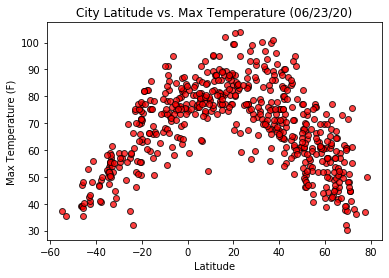

In [11]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]

# Plotting in a scatterplot with the styling 
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Putting the x, y, and title labels
plt.title("City Latitude vs. Max Temperature (06/23/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Figures/Latitude vs. Temperature.png")

Temperature is highest at 0 degree latitude at the equator. There is spherical symmetry around the equator in terms of temperature variation. 

## Latitude vs. Humidity Plot

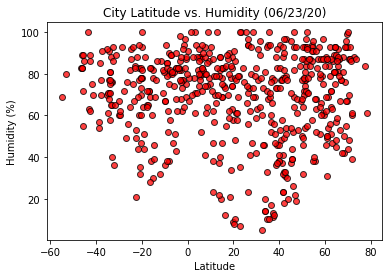

In [12]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]

# Plotting in a scatterplot with the styling 
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Putting the x, y, and title labels
plt.title("City Latitude vs. Humidity (06/23/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Figures/Latitude vs. Humidity.png")

Humidity is evenly dispersed across latitudes. Higher humidity is clustered between the range of 60%-100% and is uniformly found across all latitudes. All levels of humidity can be found in the latitude range of 20-40 degrees. 

## Latitude vs. Cloudiness Plot

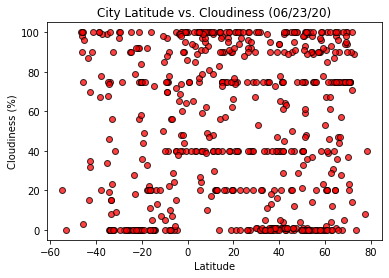

In [13]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]

# Plotting in a scatterplot with the styling 
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Putting the x, y, and title labels
plt.title("City Latitude vs. Cloudiness (06/23/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Figures/Latitude vs. Cloudiness.png")

Cloudiness is uniformly spread across all latitudes, but particularly the same latitute can have either close to 0% cloudiness or close to 100% cloudiness. 

## Latitude vs. Wind Speed Plot

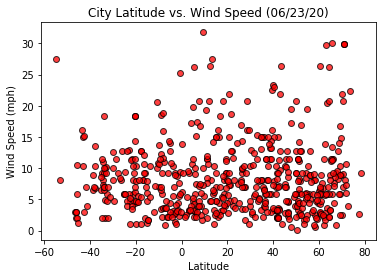

In [14]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]

# Plotting in a scatterplot with the styling 
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Putting the x, y, and title labels
plt.title("City Latitude vs. Wind Speed (06/23/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Figures/Latitude vs. Wind Speed.png")

Wind Speed is uniformly spread across all latitudes, but is more common in the ranges of 0-15 mph. 

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x, y, y_label, text_coordinates, name, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"../Figures/{name}.png")
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4843150676686275


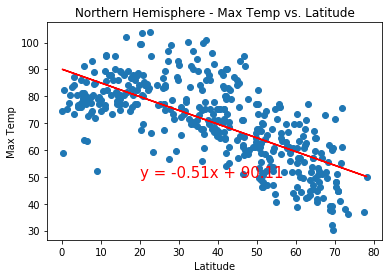

In [28]:
# Plot linear regression for Northern Hemisphere max temp vs. latitude  
n_lat = northern_hemisphere["Lat"]
n_temp = northern_hemisphere["Max Temp"]
plot_linear_regression(n_lat, n_temp, "Max Temp", (20,50), "Northern Hemisphere - Max Temp vs. Latitude", "Northern Hemisphere - Max Temp vs. Latitude")


There is a moderate negative correlation between latitude and max temperature in the Northern Hemisphere. 

The r-squared is: 0.6431006148903344


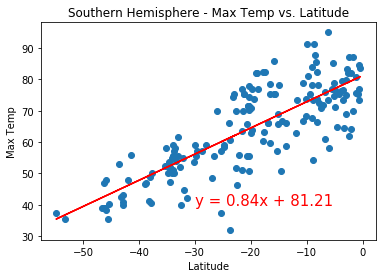

In [30]:
#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
s_lat = southern_hemisphere["Lat"]
s_temp = southern_hemisphere["Max Temp"]
plot_linear_regression(s_lat, s_temp, "Max Temp", (-30,40), "Southern Hemisphere - Max Temp vs. Latitude", "Southern Hemisphere - Max Temp vs. Latitude")


There is a strong positive correlation between latitude and max temperature in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00012463026195066494


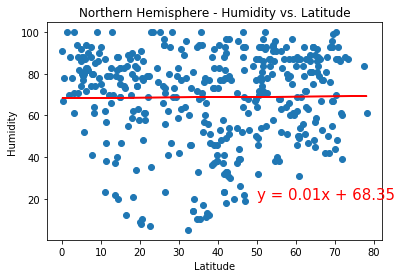

In [29]:
# Plot linear regression for Northern Hemisphere humidity vs. latitude  
n_lat = northern_hemisphere["Lat"]
n_humidity = northern_hemisphere["Humidity"]
plot_linear_regression(n_lat, n_humidity, "Humidity", (50,20), "Northern Hemisphere - Humidity vs. Latitude", "Northern Hemisphere - Humidity vs. Latitude")


There is very little correlation between latitude and humidity in the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.4208533373311367e-05


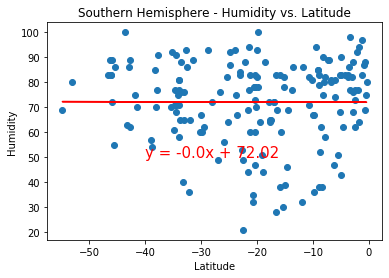

In [31]:
# Plot linear regression for Southern Hemisphere humidity vs. latitude  
s_lat = southern_hemisphere["Lat"]
s_humidity = southern_hemisphere["Humidity"]
plot_linear_regression(s_lat, s_humidity, "Humidity", (-40,50), "Southern Hemisphere - Humidity vs. Latitude", "Southern Hemisphere - Humidity vs. Latitude")


There is very little correlation between latitude and humidity in the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01816096015682156


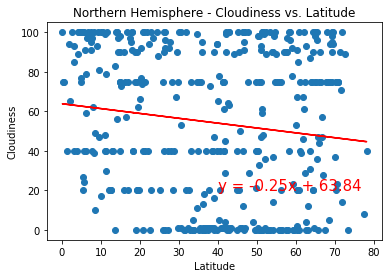

In [32]:
# Plot linear regression for Northern Hemisphere cloudiness vs. latitude  
n_lat = northern_hemisphere["Lat"]
n_cloudiness = northern_hemisphere["Cloudiness"]
plot_linear_regression(n_lat, n_cloudiness, "Cloudiness", (40,20), "Northern Hemisphere - Cloudiness vs. Latitude", "Northern Hemisphere - Cloudiness vs. Latitude")


There is slight negative correlation between latitude and cloudiness in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0001540769071005314


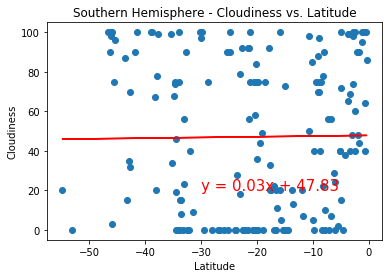

In [33]:
# Plot linear regression for Southern Hemisphere cloudiness vs. latitude  
s_lat = southern_hemisphere["Lat"]
s_cloudiness = southern_hemisphere["Cloudiness"]
plot_linear_regression(s_lat, s_cloudiness, "Cloudiness", (-30,20), "Southern Hemisphere - Cloudiness vs. Latitude", "Southern Hemisphere - Cloudiness vs. Latitude")


There is moderate positive correlation between latitude and cloudiness in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00019609824192353962


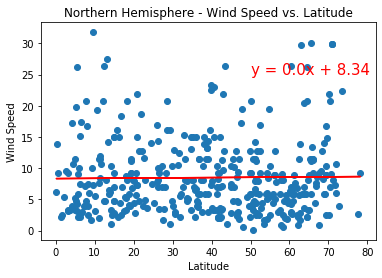

In [34]:
# Plot linear regression for Northern Hemisphere wind speed vs. latitude
n_lat = northern_hemisphere["Lat"]
n_windspeed = northern_hemisphere["Wind Speed"]
plot_linear_regression(n_lat, n_windspeed, "Wind Speed", (50,25), "Northern Hemisphere - Wind Speed vs. Latitude", "Northern Hemisphere - Wind Speed vs. Latitude")


There is very little correlation between latitude and wind speed in the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008588694185001895


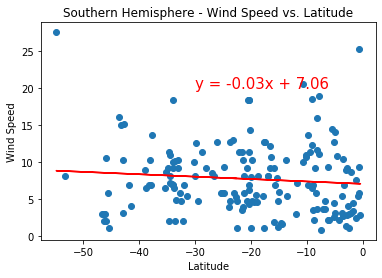

In [35]:
# Plot linear regression for Southern Hemisphere wind speed vs. latitude
s_lat = southern_hemisphere["Lat"]
s_windspeed = southern_hemisphere["Wind Speed"]
plot_linear_regression(s_lat, s_windspeed, "Wind Speed", (-30,20), "Southern Hemisphere - Wind Speed vs. Latitude", "Southern Hemisphere - Wind Speed vs. Latitude")


There is very little correlation between latitude and wind speed in the Southern Hemisphere. 